In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Polo.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'
'''

"import zipfile\nwith zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Polo.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'\n"

In [ ]:
import os
import pandas as pd
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Montar o Google Drive (se necessário)
drive.mount('/content/drive')

# Caminho base para as imagens
base_path = '/content/drive/MyDrive/pasta_principal/Polo'

# Listas de anos e cores
anos = [2000, 2001, 2002, 2003, 2006, 2007, 2008, 2009, 2010, 2012, 2019]
cores = ['Black', 'Grey', 'White']

# Inicializar listas para armazenar os dados
filenames = []
classes = []

# Iterar sobre os anos e cores para coletar os dados
for ano in anos:
    for cor in cores:
        folder_path = os.path.join(base_path, str(ano), cor)
        if os.path.exists(folder_path):
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)
                filenames.append(image_path)
                classes.append(cor)

# Criar o DataFrame
df = pd.DataFrame({'filename': filenames, 'class': classes})

# Criar geradores de dados de imagem para treinamento e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Usar flow_from_dataframe com o DataFrame 'df'
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="class",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="class",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2212 validated image filenames belonging to 3 classes.
Found 2212 validated image filenames belonging to 3 classes.


In [ ]:
# Criar o modelo de Deep Learning
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(cores), activation='softmax')  # Número de neurônios de saída = número de classes (cores)
])

# Compilar o modelo
model.compile(loss='categorical_crossentropy',  # Usar 'categorical_crossentropy' para múltiplas classes
              optimizer='adam',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Número de épocas de treinamento
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 761s 10s/step - accuracy: 0.5380 - loss: 1.1029 - val_accuracy: 0.6775 - val_loss: 0.6231
Epoch 2/10
 1/69 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.7812 - loss: 0.5117

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


69/69 ━━━━━━━━━━━━━━━━━━━━ 40s 566ms/step - accuracy: 0.7812 - loss: 0.5117 - val_accuracy: 0.5000 - val_loss: 0.8301
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7425 - loss: 0.5779 - val_accuracy: 0.7998 - val_loss: 0.4600
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 43s 596ms/step - accuracy: 0.8125 - loss: 0.5148 - val_accuracy: 0.7500 - val_loss: 0.2493
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.7863 - loss: 0.4821 - val_accuracy: 0.8469 - val_loss: 0.3716
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 40s 574ms/step - accuracy: 0.9375 - loss: 0.3498 - val_accuracy: 1.0000 - val_loss: 0.1331
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.8123 - loss: 0.4315 - val_accuracy: 0.8655 - val_loss: 0.3367
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7812 - loss: 0.3952 - val_accuracy: 0.7500 - val_loss: 0.3290
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8307 - loss: 0.4016 - val_accuracy: 0.8755 - val_lo

In [ ]:
# Avaliar o modelo
validation_steps = 69  # Número de passos de validação calculado
loss, accuracy = model.evaluate(validation_generator, steps=validation_steps)
print('Loss:', loss)
print('Accuracy:', accuracy)

69/69 ━━━━━━━━━━━━━━━━━━━━ 42s 603ms/step - accuracy: 0.8746 - loss: 0.3135
Loss: 0.31070345640182495
Accuracy: 0.8740941882133484


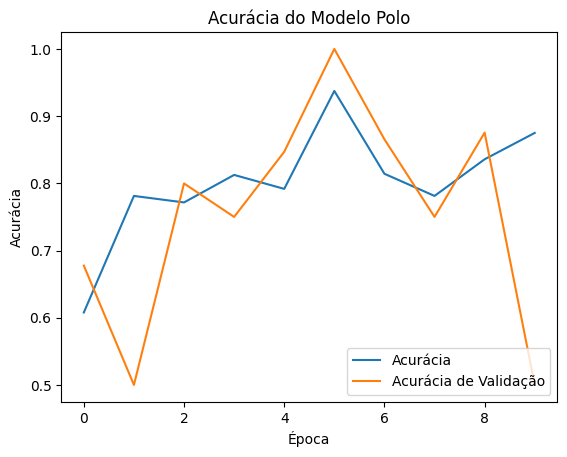

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia')  # Label da linha de acurácia
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')  # Label da linha de acurácia de validação
plt.xlabel('Época')  # Label do eixo x
plt.ylabel('Acurácia')  # Label do eixo y
plt.title('Acurácia do Modelo Polo')  # Título do gráfico
plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Perda (loss)')
plt.plot(history.history['val_loss'], label='Perda de Validação (val_loss)')
plt.title('Gráfico de Perda do Modelo Civic')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')  # Ajusta a posição da legenda para melhor visualização
plt.show()